# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wg
from ipywidgets import interactive

%matplotlib inline

# jupyter nbextension enable --py widgetsnbextension --sys-prefix
# restart jupyter notebook

# Regressão 

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


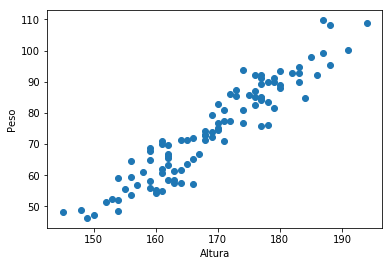

In [3]:
x = df.Altura
y = df.Peso

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
def plot_line(w, b):
    plt.figure(0, figsize=(20,4))
    plt.subplot(1,3,3)
    plt.scatter(x, y)
    y_pred = w*x + b
    plt.plot(x, y_pred, c='red')
    plt.xlim(140, 210)
    plt.ylim(40, 120)
    
    plt.subplot(1,3,2)
    x_ = np.array([0, x.max()])
    y_ = w*x_ + b
    plt.scatter(x, y)
    plt.plot(x_, y_, c='red')
    plt.xlim(0, 210)
    plt.ylim(-160, 120)
    
    plt.subplot(1,3,1)
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    loss.append(rmse)
    plt.plot(loss)
    plt.title('Loss')
    
    plt.show()

In [5]:
loss = []

interactive_plot = interactive(plot_line, w=(1, 1.5, 0.01), b=(-200, 0, 1))
output = interactive_plot.children[-1]
output.layout_height = '350px'
interactive_plot

Widget Javascript not detected.  It may not be installed or enabled properly.


In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.values.reshape(-1,1), y)
print("w: {:.2f} \nb: {:.2f}".format(reg.coef_[0], reg.intercept_))

w: 1.37 
b: -157.47


# Classificação

### Porta AND

In [7]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 0, 0, 1]]).T

print(x, y, sep='\n')

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


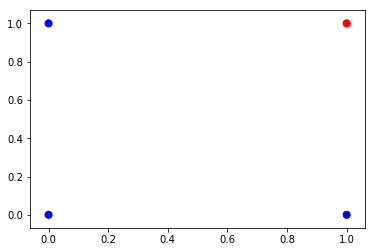

In [8]:
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='bwr')

In [9]:
def plot_line(w1, w2, threshold, b):
    x1, x2 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    x_teste = np.array([x1.ravel(), x2.ravel()]).T
    
    plt.figure(0, figsize=(10,4))
    plt.subplot(1,2,2)
    plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='bwr')
    y_pred = np.dot(np.array([w1, w2]), x_teste.T) + b
    y_pred = np.where(y_pred <= threshold, 0, 1)

    plt.contourf(x1, x2, y_pred.reshape(x1.shape), cmap='bwr')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
#     plt.subplot(1,2,1)
#     rmse = np.sqrt(np.mean((y - y_pred)**2))
#     loss.append(rmse)
#     plt.plot(loss)
#     plt.title('Loss')
    
    plt.show()

In [10]:
interactive_plot = interactive(plot_line, w1=(0,1,0.01), w2=(0,1,0.01), threshold=(0,1,0.1), b=(0, 1, 0.1))
interactive_plot

Widget Javascript not detected.  It may not be installed or enabled properly.


### Porta OR

### Porta XOR